> 시계열 분석을 정리하고자 한다. 시계열 데이터의 특징(자기상관, 정상성 등)에 대해 알아보자.

일반적으로 변수 $x$에 대한 시계열은 $x_t$로 표시되며, 여기서 $t$는 시간을 나타낸다. 전체 시간 집합 $t=1,2, ..., T$는 관찰 기간이며, 관측치는 일반적으로 동일한 간격(예: 분, 시간 또는 일 등)으로 측정된다.

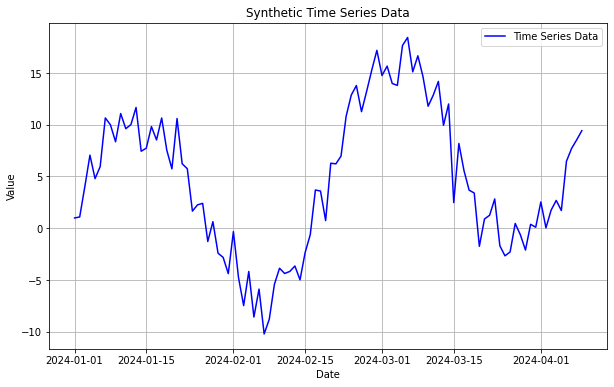

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic time series data
# trend, seasonality, noise로 구성된 time series data를 생성한다.
np.random.seed(42)
num_points = 100
time_index = pd.date_range(start='2024-1-1', periods=num_points, freq='D')
trend = 0.1 * np.arange(num_points)
seasonality = 10 * np.sin(np.linspace(0, 4 * np.pi, num_points))
noise = np.random.normal(loc=0, scale=2, size=num_points)
time_series_data = trend + seasonality + noise

# Create a DataFrame with the time series data
df = pd.DataFrame({'Date': time_index, 'Value': time_series_data})
df = df.set_index('Date')

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df, label='Time Series Data', color='blue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Synthetic Time Series Data')
plt.legend()
plt.grid(True)

## 계절성, 추세, 잡음

- 계절성(Seasonality): 많은 시계열 데이터에서 일정한 시간 간격으로 반복되는 패턴을 관찰할 수 있다. 예를 들어, 소매업에서는 연말 연시에 매출이 증가하는 계절적 패턴이 존재한다.

<img src='img/ts_mils_f1_4.png' width=500>

계절성은 계절요인의 더미변수를 고려하거나, 삼각함수를 이용하여 모델링할 수 있다.

- 추세(Trend): 시계열 데이터에서는 장기적으로 관찰될 수 있는 상승 또는 하락 추세를 볼 수 있다. 예를 들어, 경제 성장으로 인한 장기적인 주가 상승이 있을 수 있다.

<img src='img/ts_mils_f1_6.png' width=500>
<img src='img/ts_mils_f1_8.png' width=500>

선형 추세 모형(linear trend model)을 least square를 이용하여 구할 수 있다.

$Z_t = \beta_0 + \beta_1t+ \epsilon$

- 잡음(Noise): 시계열 데이터는 종종 잡음을 포함한다. 잡음은 데이터에서 관찰되는 무작위 변동을 의미하며, 이는 분석가가 실제 신호를 잡음으로부터 분리해야 함을 의미한다.

- 순환 변동(Cyclical Variations): 추세나 계절성과는 별개로, 시계열 데이터에는 경제 사이클 같은 더 긴 시간 단위의 변동 패턴이 존재할 수 있다. 이러한 순환 변동은 명확한 주기를 가지지 않을 수도 있다.

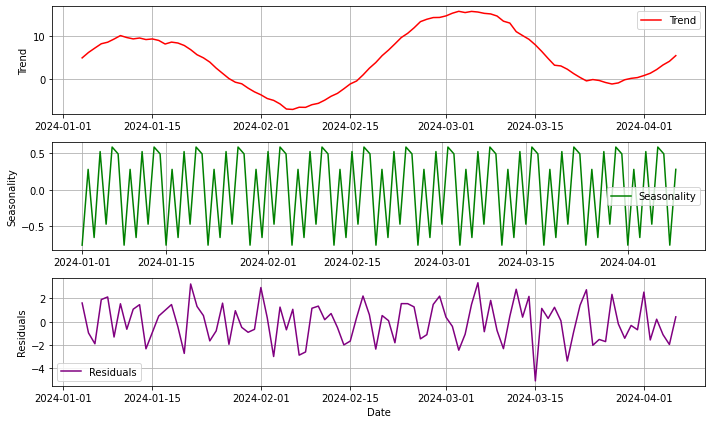

In [22]:
# statsmodels의 분해 함수로 시계열 모형을 분해해보자.
# Decompose the time series data into components (trend, seasonality, and residuals)
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, model='additive')

trend_component = decomposition.trend
seasonal_component = decomposition.seasonal
residuals = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(trend_component, label='Trend', color='red')
plt.ylabel('Trend')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(seasonal_component, label='Seasonality', color='green')
plt.ylabel('Seasonality')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(residuals, label='Residuals', color='purple')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 변동성

- 변동성(Volatility): 시간에 따른 변수의 변동 정도를 의미하고, 대부분 표준편차나 분산으로 측정된다. 대부분의 시계열 데이터(특히 금융시장)에서는 변동성의 군집현상(volatility clustering)이 발생하는데, 이러한 현상은 오차항의 분산이 일정하다는 회귀모형의 기본적인 가정을 만족시키지 못하게 된다.


즉, 외부 요인에 영향을 받는다는 의미이며, 이러한 영향으로 인해 시계열에서 분산이 일정해지지 않는 이분산성(Heteoskedasticity)이 나타나게 된다.

<img src='img/ts_mils_f1_9.png' width=500>0>

- 변동성 측정 방법
  - historical volatility: 과거 가격 데이터를 기반으로 계산(표준편차)
  - implied volatility: 옵션 가격으로부터 역산하여 얻은 변동성. 시장 참여자들이 기대하는 미래 변동성을 반영
  - GARCH model: 시계열 데이터의 조건부 변동성을 모델링. 이 모델은 변동성이 시간에 따라 변화하고 과거 변동성에 의존한다고 가정

## 시간 종속성

- 시간 종속성(Time Dependency): 시계열 데이터는 시간을 기준으로 정렬되어 시간 순서에 의존적이다. 즉, 과거의 값이 미래의 값에 영향을 미칠 수 있고, 따라서 데이터의 시간 순서를 유지하는 것이 중요하다.
  - 자기상관함수(Autocorrelation Function, ACF), 부분자기상관함수(Partial Autocorrelation Function, PACF)

### 자기상관함수

시계열 데이터의 자기상관 함수(Autocorrelation Function, ACF)와 부분자기상관 함수(Partial Autocorrelation Function, PACF)는 시계열의 시간 종속성을 분석하는 데 중요한 도구이다.

$ACF(k)(\rho_k) = \frac{\text{cov}(y_t, y_{t+k})}{\text{var}(y_t)} = \frac{\sum_{t=1}^{N-k}(y_t - \bar{y})(y_{t+k} - \bar{y})}{\sum_{t=1}^{N}(y_t - \bar{y})^2} \cdot \frac{N}{N - k}$

ACF는 $y_t$와 $y_{t+k}$ 간 correlation을 측정한다. 단, 실제 자기 상관 함수(ACF)는 구할 수 없고 데이터를 이용하여 추정해야 하며, 시계열 관측치가 주어졌다고 했을 때 SACF(Sample ACF)를 구한다. ARIMA 모형에서 이동 평균(MA) 항의 차수(order)를 판단하는데 활용된다.

$PACF(k)(\phi_{k}) = \text{Corr}(y_t - \hat{y}_t^{(k-1)}, y_{t-k} - \hat{y}_{t-k}^{(k-1)})$

- 여기서,
  - $\hat{y}_t^{(k-1)}$는 시간 $t$에서의 관측치를 시차 $1$에서 $k-1$까지의 관측치로 선형회귀한 모델에 의해 예측된 값
  - $\hat{y}_{t-k}^{(k-1)}$는 시간 $t-k$에서의 관측치를 시차 $1$에서 $k-1$까지의 관측치로 선형회귀한 모델에 의해 예측된 값

PACF는 $t$와 $t+k$ 사이에 다른 $y$값들의 영향력을 배제하고 correlation을 측정하는 것으로, ARIMA 모형에서 자기 회귀 차수를 식별하는 용도로 사용된다.

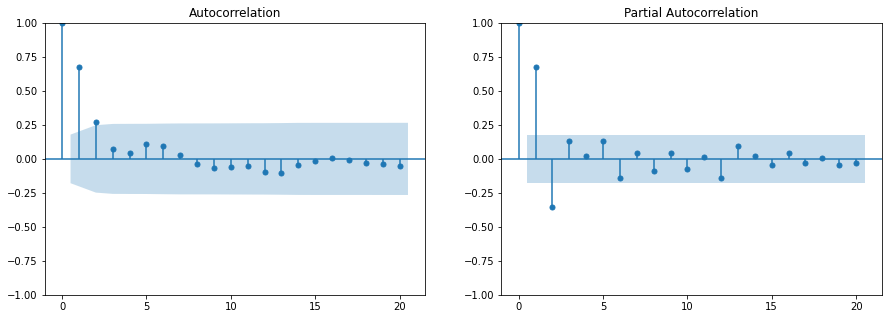

In [23]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt

# ARMA 모델을 위한 파라미터 설정 (ARMA(1,1) 모델로 설정)
ar_params = np.array([1, -0.5]) # AR 파라미터에는 첫 번째 항이 1이어야 함 (상수 항)
ma_params = np.array([1, 0.5])  # MA 파라미터에는 첫 번째 항이 1이어야 함 (상수 항)

# ARMA(1,1) 프로세스 정의
arma_process = ArmaProcess(ar=ar_params, ma=ma_params)

# 시계열 데이터 생성
np.random.seed(42)
n_points = 120
data = arma_process.generate_sample(nsample=n_points)
timeseries_data = pd.Series(data)

# ACF 및 PACF 계산
lags = 20  # 사용할 시차의 수
acf_values = acf(timeseries_data, nlags=lags)
pacf_values = pacf(timeseries_data, nlags=lags)

# ACF와 PACF 플롯을 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sm.graphics.tsa.plot_acf(timeseries_data, lags=lags, ax=axes[0])
sm.graphics.tsa.plot_pacf(timeseries_data, lags=lags, ax=axes[1])
plt.show()

다음 포스트에서 이를 활용해 ARIMA 모형의 차수를 구하는 방법을 알아보기로 한다.

## 정상성

- 정상성(Stationarity): 정상 시계열은 **시간에 따른 통계적 속성(평균, 분산 등)이 일정하게 유지**되는 특성을 가진다. 많은 시계열 분석 기법은 데이터가 정상성을 가정하며, 비정상 시계열 데이터를 분석하기 위해서는 추가적인 전처리가 필요할 수 있다.

- 강정상성(strong/strictly stationary): 시계열 데이터($X_t$)의 결합확률분포($F_X$)가 시간 이동에 대해 불변이라는 속성을 의미한다. 강정상성을 띠는 시계열은 모든 적률(moments)이 시간과 무관하게 일정하다.

$$F_X(x_{t}, x_{t+1}, ..., x_{t+k}) = F_X(x_{t+\tau}, x_{t+1+\tau}, ..., x_{t+k+\tau})$$

- 약정상성(weak stationary): 다음의 세 가지 조건을 만족
1. 모든 시점 $ t $에 대하여 $E(X_t) = \mu$
2. 모든 시점 $ t $에 대하여 $Var(X_t) < \infty $
3. 모든 시점 $ t $, $h$에 대하여 $Cov(X_{t+h}, X_t) = \gamma(h) $(즉, 공분산이 $t $에 의존하지 않고 $h$만에 의존한다.) $\gamma(h) $는 자기공분산함수(auto covariance function, ACF)라 한다.

### 랜덤워크(Random walk)

$X_t = X_{t-1} + Z_t$

$Z_t \sim WN(0, \sigma^2)$

$X_t$는 random walk 한다고 말한다.

또한, random walk를 자기회귀모형식으로 표현하면 AR(1) 모형을 가지며, 단위근(unit root)을 가진다고 한다.

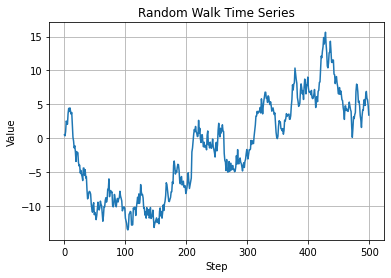

In [76]:
# 랜덤 워크 데이터 생성
np.random.seed(42)
n = 500  # 데이터 포인트의 수
walk = np.random.normal(0, 1, n).cumsum()

# 시각화
plt.plot(walk)
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Random Walk Time Series')
plt.grid(True)
plt.show()

### 단위근검정(Unit root test)

- 단위근(unit root): $X_t = \alpha X_{t-1} + \epsilon_t$에서 $|\alpha| =1 $이면 시계열은 단위근을 가진다. 이는 시계열이 평균으로 회귀하지 않고, 즉 랜덤 워크의 형태로 변화하는 것을 의미한다. 즉 단위근을 가지면 stationary하지 않다.

ADF test(Augmented Dickey-Fuller) Test

- 귀무가설 (H0): 시계열 데이터는 단위근을 가짐 (unstationary)
- 대립가설 (H1): 시계열 데이터는 단위근을 가지지 않음 (stationary)

In [77]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# ADF 검정 수행
result = adfuller(walk) #랜덤워크
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.498630
p-value: 0.534189
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


In [78]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# ARMA 모형의 계수 설정
ar_params = [0.5, -0.2]  # 자동 회귀(AR) 모형의 계수
ma_params = [0.3, -0.1]  # 이동 평균(MA) 모형의 계수

# 시계열 데이터 생성 (단위근 없음)
np.random.seed(0)
n = 1000  # 시계열의 길이
ar = np.r_[1, -np.array(ar_params)]  # AR 모형의 파라미터 배열 생성
ma = np.r_[1, np.array(ma_params)]  # MA 모형의 파라미터 배열 생성
arma_process = sm.tsa.ArmaProcess(ar, ma)
data = arma_process.generate_sample(nsample=n)

# ADF 검정 수행
result = adfuller(data) #ARMA 사용
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.498778
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


ADF 검정과 같이 정상성을 검정하는 방법으로 여러 가지가 있다.

**KPSS** (Kwiatkowski–Phillips–Schmidt–Shin) Test: 시계열 데이터의 누적 합계의 제곱에 대한 표준편차를 사용. ADF와 귀무가설, 대립가설이 반대이다.

In [79]:
from statsmodels.tsa.stattools import kpss

# KPSS 검정 수행 - RW
kpss_stat, p_value, lags, crit_values = kpss(walk)

# 결과 출력
print(f'KPSS 검정 통계량: {kpss_stat}')
print(f'p-value(RW): {p_value}')

# KPSS 검정 수행
kpss_stat, p_value, lags, crit_values = kpss(data)

# 결과 출력
print(f'KPSS 검정 통계량: {kpss_stat}')
print(f'p-value: {p_value}')

KPSS 검정 통계량: 2.8794199665024265
p-value(RW): 0.01
KPSS 검정 통계량: 0.4224597532310452
p-value: 0.06747424429696329


<ipython-input-79-c88ad237ed8e>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, crit_values = kpss(walk)


**Phillips Perron Test**: PP 검정은 ADF 검정과 유사하지만, 시리즈의 자기상관을 모델링하기 위해 다른 접근을 사용한다. PP 검정은 수정된 t 통계량을 사용하여 단위근의 존재를 검정하며, 이는 시계열의 특정 형태의 자기상관과 이질적 분산을 고려할 수 있게 해준다.

In [80]:
from arch.unitroot import PhillipsPerron
 
for tt in ['n','c']:
    pp = PhillipsPerron(walk, trend=tt, test_type='tau')
    print(pp.summary().as_text())
print('')
for tt in ['n','c']:
    pp = PhillipsPerron(data, trend=tt, test_type='tau')
    print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.480
P-value                         0.130
Lags                               18
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.482
P-value                         0.542
Lags                               18
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

     Phillips-Perron Test (Z-tau)    
Test Statistic                -16.468
P-value                         0.000
Lags                               22
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
N

## 시계열 데이터 변형

차분(differencing), 변환(transformation), 분해(decomposition), 평활화(smoothing), 선형회귀 추세제거, ARIMA 등이 있다.

비정상 시계열을 정상 시계열로 바꾸는 등의 목적으로 쓰인다.

- 차분: 시점 간 차이 등을 이용한다.

- 1차 차분: $\Delta X_t = X_t - X_{t-1}$
- 2차 차분: 1차 차분을 한번 더 차분
- 로그 차분 / 수익률
- 계절차분
- [분수차분(Fractional difference)](https://jo-cho.github.io/FinBlog/posts/fin_data/Fractional_difference.html) 등

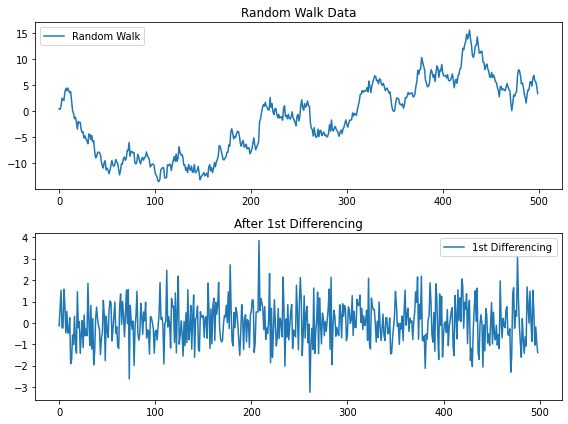

In [105]:
# 1차 차분
diff = np.diff(walk, n=1)

# 원본 데이터와 차분 데이터 시각화
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.plot(walk, label='Random Walk')
plt.title('Random Walk Data')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(diff, label='1st Differencing')
plt.title('After 1st Differencing')
plt.legend()

plt.tight_layout()
plt.show()

- 변환: 로그 변환, Box-cox 변환 등

**로그 변환**: 로그 변환은 시계열 데이터의 분산을 안정화하고, 비선형 트렌드를 선형화하여 분석을 용이하게 하는 데 도움이 된다. 특히, 시계열 데이터의 값이 시간에 따라 지수적으로 증가하거나 감소하는 경우 유용하다.

**Box-cox 변환**: Box-Cox 변환은 시계열 데이터의 분산을 안정화하고, 정규성을 개선하기 위해 사용되는 일종의 데이터 변환 기법이다. 이 변환은 데이터에 음수 값이 없을 때 사용할 수 있으며, 하나의 파라미터(λ, 람다)를 사용하여 여러 가지 변환을 일반화한 형태이다.

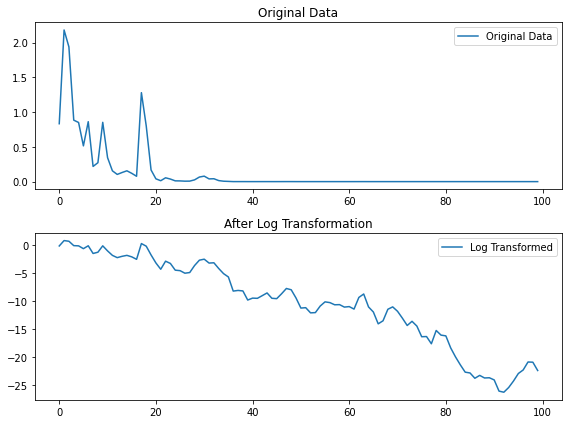

In [112]:
# 랜덤 워크 데이터 생성 (여기서는 로그 변환을 보여주기 위해 양의 값으로 생성)
np.random.seed(452)
n = 100
data = np.exp(np.random.normal(0, 1, n).cumsum())

# 로그 변환
log_data = np.log(data)

# 원본 데이터와 로그 변환 데이터 시각화
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.plot(data, label='Original Data')
plt.title('Original Data')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(log_data, label='Log Transformed')
plt.title('After Log Transformation')
plt.legend()

plt.tight_layout()
plt.show()

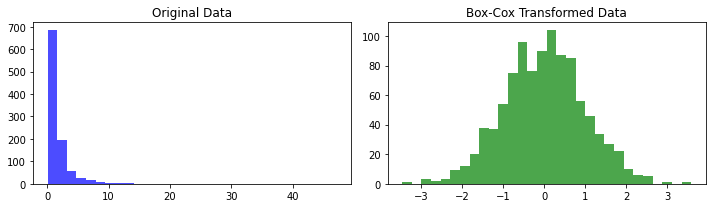

Optimal Lambda: -0.04


In [117]:
from scipy.stats import boxcox
# 양의 값을 가진 임의의 데이터 생성 (ex 분산)
np.random.seed(42)
data = np.random.lognormal(mean=0.0, sigma=1.0, size=1000)
# Box-Cox 변환 수행
transformed_data, best_lambda = boxcox(data)
# 원본 데이터와 Box-Cox 변환된 데이터의 히스토그램 비교
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title('Original Data')
plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, color='green', alpha=0.7)
plt.title('Box-Cox Transformed Data')
plt.tight_layout()
plt.show()
print(f"Optimal Lambda: {best_lambda:.2f}")

- 분해: 요소 분해 (계절적 분해)
  - 위의 statsmodel.tsa 에서 함수를 제공한다.

- 평활화: 이동평균(moving average), 지수가중 이동평균(EWMA) 등
  - 평활화(smoothing)은 추세-주기를 측정하기 위해 사용된다.

$SMA_t = \frac{1}{n}\sum_{i=t-n+1}^{t} x_i$

$WMA_t = \sum_{i=t-n+1}^{t} w_i x_i$

$EMA_t = \alpha x_t + (1-\alpha) EMA_{t-1}$

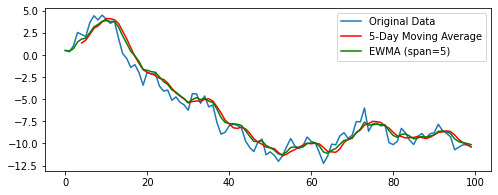

In [113]:
import pandas as pd

# 예제 데이터 생성
np.random.seed(42)
data = pd.Series(np.random.randn(100).cumsum())

# 5일 이동 평균
rolling_mean = data.rolling(window=5).mean()
# EWMA 계산
ewma = data.ewm(span=5).mean()

# 원본 데이터와 이동 평균 시각화
plt.figure(figsize=(8, 3))
plt.plot(data, label='Original Data')
plt.plot(rolling_mean, label='5-Day Moving Average', color='red')
plt.plot(ewma, label='EWMA (span=5)', color='green')
plt.legend()
plt.show()

ARIMA에 대해서는 다음 포스트에서 다루며, AR, MA, ARMA 모형에 대해서도 다룬다.

# 참고자료

- Mills, T. C. (2019). Applied time series analysis: A practical guide to modeling and forecasting. Academic press.

- https://github.com/ehmanori/Data-Analysis/blob/master/시계열%20데이터의%20특징.ipynb

- ChatGPT (For some codes)